In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Prevents warnings from showing up, the warnings in this notebook have already been evaluated and can be ignored.
warnings.filterwarnings("ignore")

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
white_wine_data_df = pd.read_csv(
    "Resources/winequality-red.csv")

# def convert_to_binary(value):
#     if value >= 6:
#         return 1
#     else:
#         return 0

# white_wine_data_df['quality'] = white_wine_data_df['quality'].apply(convert_to_binary)

# Review the DataFrame
white_wine_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = white_wine_data_df["quality"]

# Separate the X variable, the features
x = white_wine_data_df.drop(columns="quality")

In [4]:
# Review the y variable Series
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
# Review the X variable DataFrame
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

---

# Model 1: Multiclass Logistic Regression (One Vs. Rest)


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='ovr')

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.24492647058823533

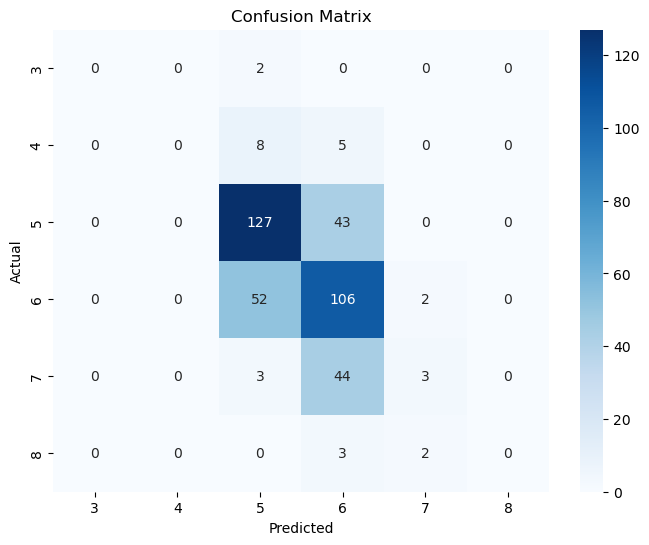

In [10]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        13
           6       0.66      0.75      0.70       170
           5       0.53      0.66      0.59       160
           4       0.43      0.06      0.11        50
           3       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.27      0.24      0.23       400
weighted avg       0.55      0.59      0.55       400



### Multiclass Logistic Regression (One Vs. Rest) with Resampled Training Data

In [12]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [13]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='ovr')

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

In [15]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.5257773805849179

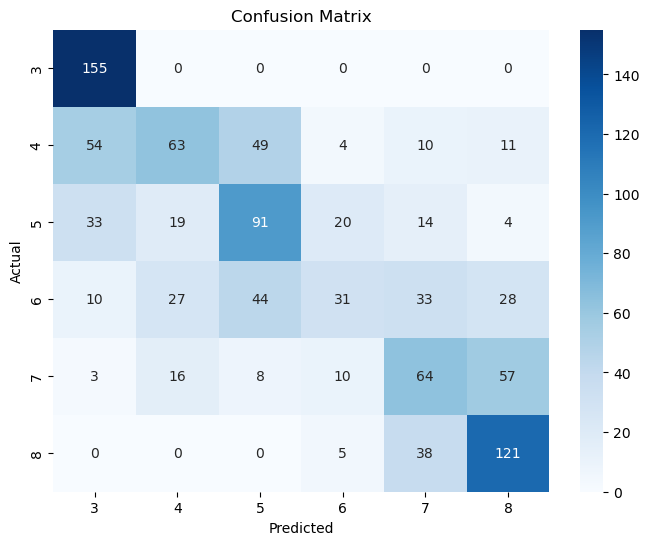

In [16]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           8       0.61      1.00      0.76       155
           7       0.50      0.33      0.40       191
           6       0.47      0.50      0.49       181
           5       0.44      0.18      0.26       173
           4       0.40      0.41      0.40       158
           3       0.55      0.74      0.63       164

    accuracy                           0.51      1022
   macro avg       0.50      0.53      0.49      1022
weighted avg       0.50      0.51      0.48      1022



---

# Model 2: MultinomialLogisticRegression (SoftMax)


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [18]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='multinomial')

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.23468137254901963

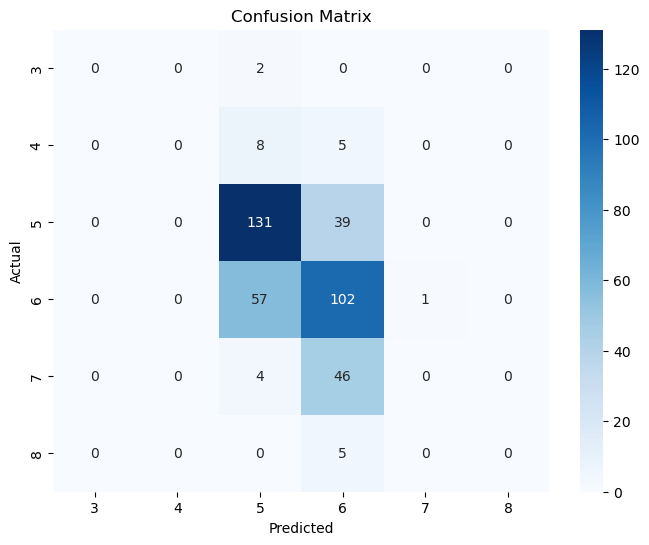

In [21]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        13
           6       0.65      0.77      0.70       170
           5       0.52      0.64      0.57       160
           4       0.00      0.00      0.00        50
           3       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.19      0.23      0.21       400
weighted avg       0.48      0.58      0.53       400



### Multiclass Logistic Regression (One Vs. Rest) with Resampled Training Data

In [23]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [24]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='multinomial')

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

In [26]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.46973376824487345

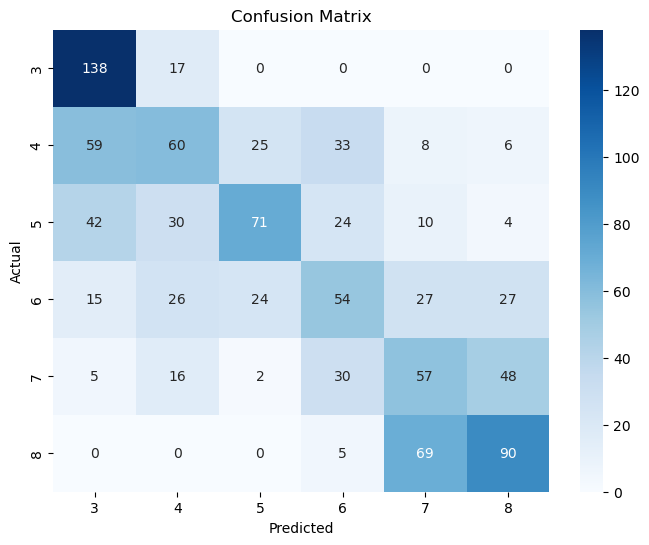

In [27]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           8       0.53      0.89      0.67       155
           7       0.40      0.31      0.35       191
           6       0.58      0.39      0.47       181
           5       0.37      0.31      0.34       173
           4       0.33      0.36      0.35       158
           3       0.51      0.55      0.53       164

    accuracy                           0.46      1022
   macro avg       0.46      0.47      0.45      1022
weighted avg       0.46      0.46      0.45      1022



---

# Model 3: Random Forest


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [29]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [30]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [31]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.33169117647058827

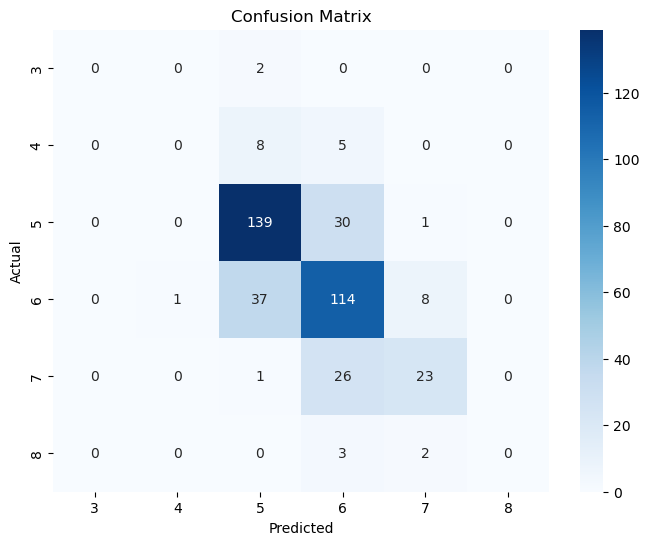

In [32]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        13
           6       0.74      0.82      0.78       170
           5       0.64      0.71      0.67       160
           4       0.68      0.46      0.55        50
           3       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.34      0.33      0.33       400
weighted avg       0.66      0.69      0.67       400



### Evaluating again with Resampled Training Data

In [34]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [35]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

pd.DataFrame({"Prediction": predictions_resampled, "Actual": y_test}).value_counts()

Prediction  Actual
4           4         191
8           8         164
3           3         155
7           7         153
5           5         133
6           6         126
            5          44
5           6          27
7           6          19
6           7           5
4           5           2
3           5           1
4           6           1
7           5           1
dtype: int64

In [37]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.9052474599393276

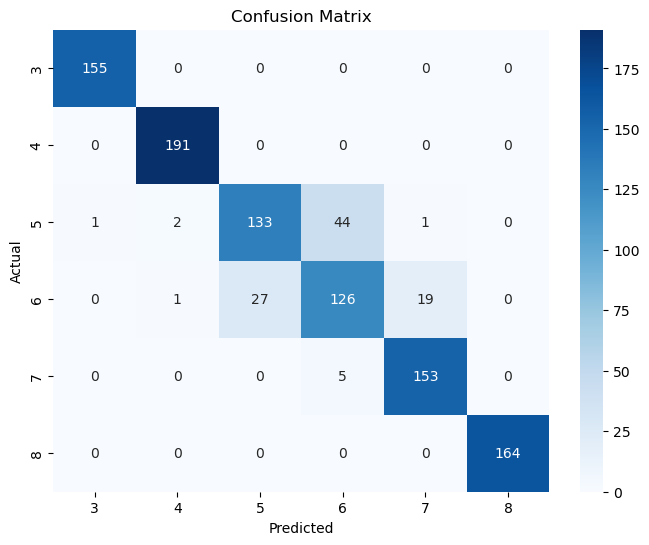

In [38]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8"], yticklabels=["3","4","5","6","7","8"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Print the classification report for the model
target_names = ["8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           8       0.99      1.00      1.00       155
           7       0.98      1.00      0.99       191
           6       0.83      0.73      0.78       181
           5       0.72      0.73      0.72       173
           4       0.88      0.97      0.92       158
           3       1.00      1.00      1.00       164

    accuracy                           0.90      1022
   macro avg       0.90      0.91      0.90      1022
weighted avg       0.90      0.90      0.90      1022



### Figure: Feature Importance for best model: Random Forest without RandomOverSampling

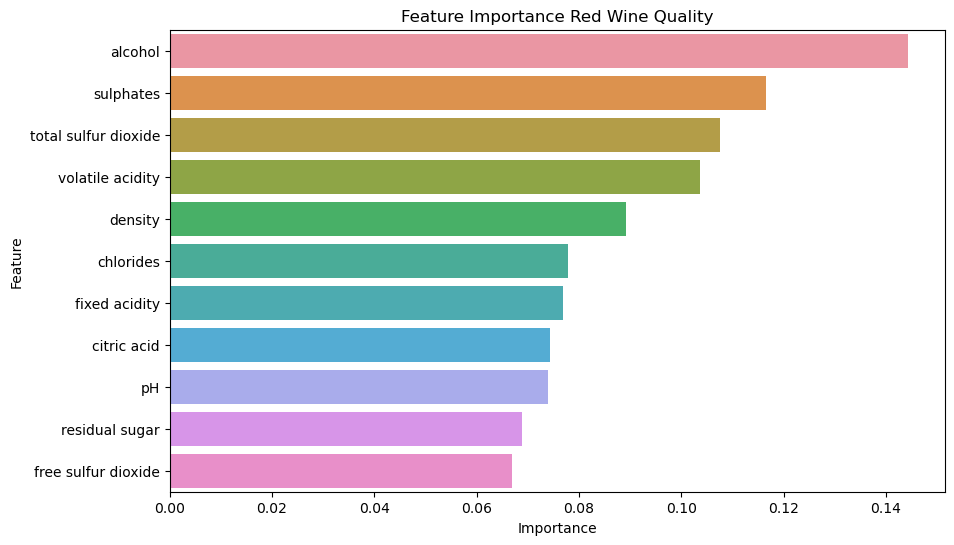

In [41]:
# Calculate feature importances (absolute values of coefficients)
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': np.abs(classifier.feature_importances_)})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Red Wine Quality')
plt.show()